In [2]:
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-paper")
plt.rcParams["font.family"] = "monospace"

In [3]:
PATH = "/home/sparrow/cv/data/cables"

In [4]:
CABLES = [
    PATH + "/1.png",
    PATH + "/2.png",
    PATH + "/3.png",
    PATH + "/4.png",
    PATH + "/5.png",
    PATH + "/6.png",
    PATH + "/7.png",
    PATH + "/9.png",
    PATH + "/11.png",
    PATH + "/12.png",
    PATH + "/14.png",
    PATH + "/15.png",
    PATH + "/16.png"
]

In [5]:
cables = [cv2.imread(cable) for cable in CABLES]
gray_cables = [cv2.cvtColor(cable, cv2.COLOR_BGR2GRAY) for cable in cables]

## Adaptive Thresholding

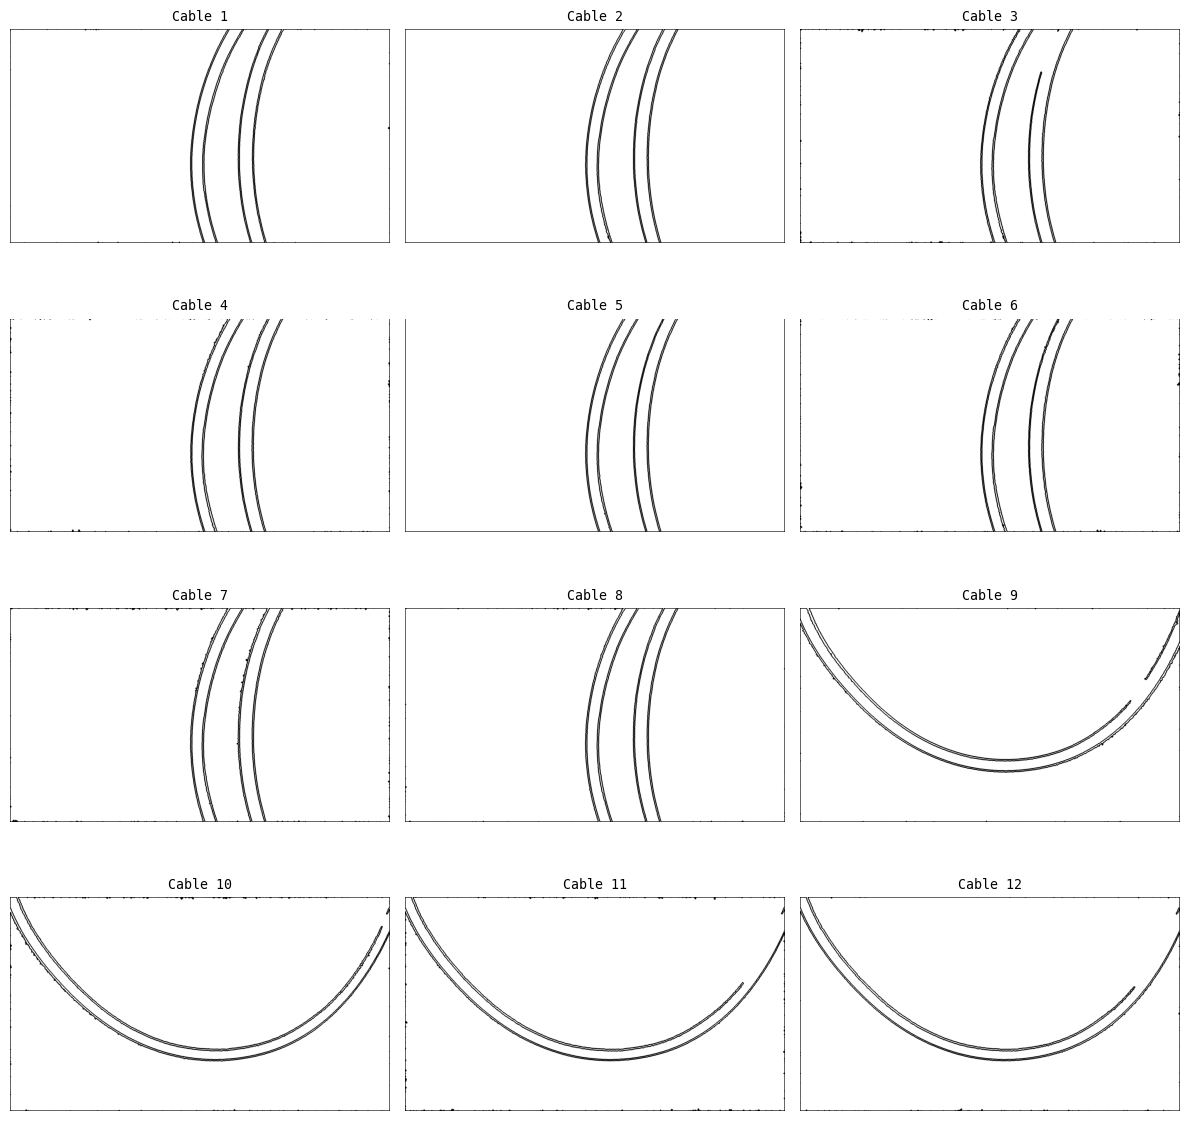

In [5]:
adaptive_thresholded_images = []

for cable in cables:
    img = cv2.cvtColor(cable, cv2.COLOR_RGB2GRAY)
    adaptive_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2)
    adaptive_thresholded_images.append(adaptive_thresh)

# Get rid of the salt-pepper noise
for i in range(12):
    adaptive_thresholded_images[i] = cv2.medianBlur(adaptive_thresholded_images[i], 5)
    
# Extract the contours from the adaptive thresholded images
contours = []
for i in range(12):
    contours.append(cv2.findContours(adaptive_thresholded_images[i], cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)[0])
    
# Draw the contours
contour_images = []
for i in range(12):
    contour_image = np.zeros_like(adaptive_thresholded_images[i])
    cv2.drawContours(contour_image, contours[i], -1, (255 ,255, 255), 3)
    contour_images.append(contour_image)

# Improve the brightness and contrast of the contour images
for i in range(12):
    contour_images[i] = np.log(contour_images[i] + 2)
    
# Plot the images
fig, ax = plt.subplots(4, 3, figsize=(12, 12))
for i in range(4):
    for j in range(3):
        ax[i, j].imshow(contour_images[i * 3 + j], cmap="gray")
        ax[i, j].axis("off")
        ax[i, j].set_title(f"Cable {i * 3 + j + 1}")
plt.tight_layout()
plt.show()

In [7]:
# Level Set Segmentation
from skimage import segmentation

level_set_images = []
for i in range(12):
    level_set_images.append(segmentation.chan_vese(gray_cables[i], mu=0.25, lambda1=1, lambda2=1, tol=1e-3, max_num_iter=1000, dt=0.5, init_level_set="checkerboard"))

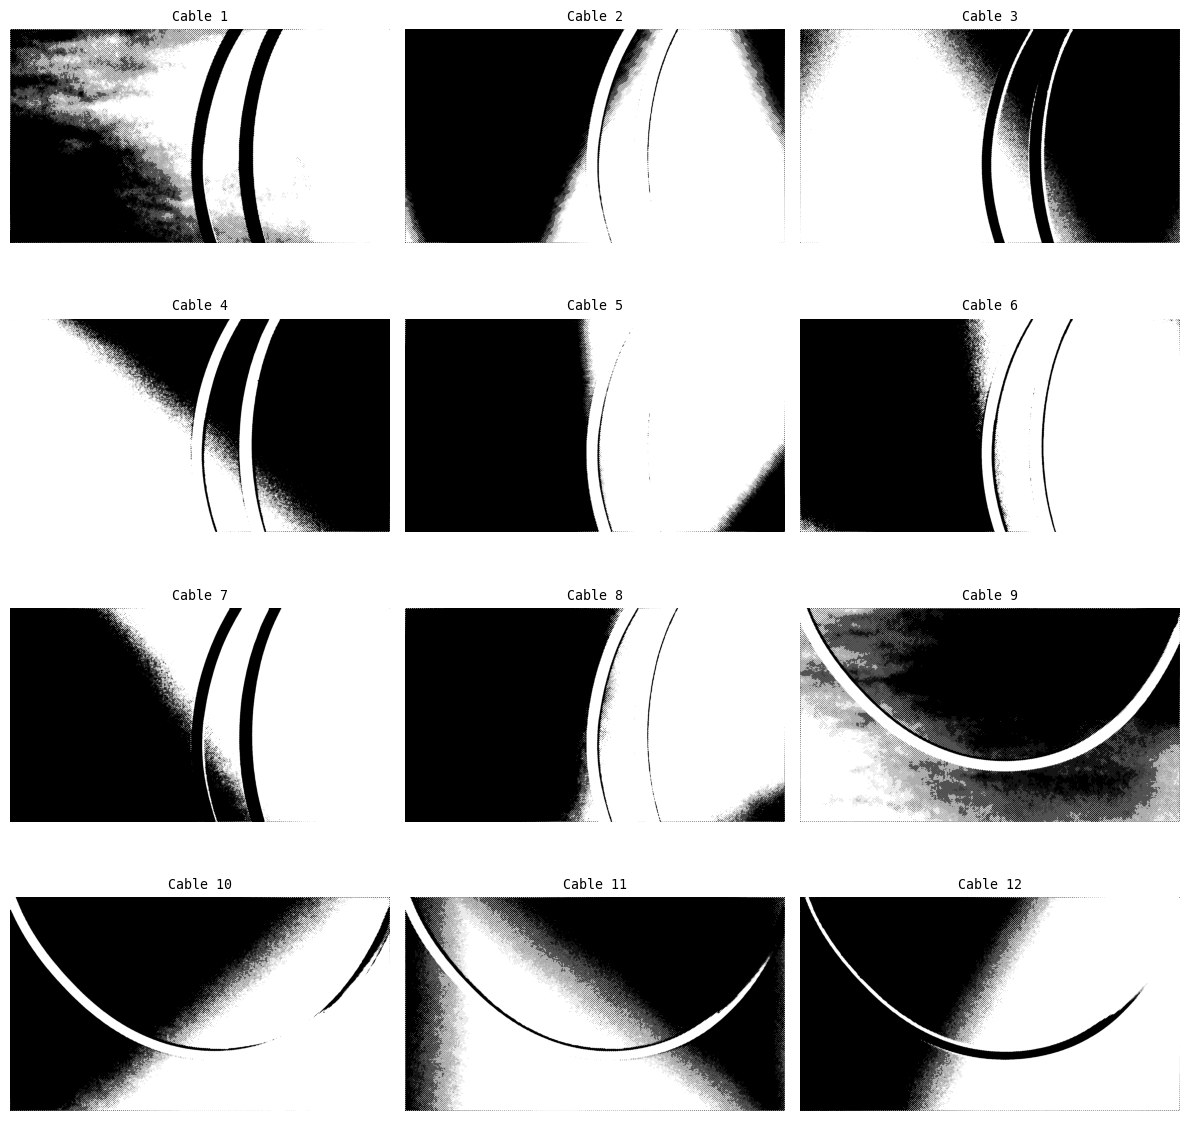

In [8]:
# Plot the images
fig, ax = plt.subplots(4, 3, figsize=(12, 12))
for i in range(4):
    for j in range(3):
        ax[i, j].imshow(level_set_images[i * 3 + j], cmap="gray")
        ax[i, j].axis("off")
        ax[i, j].set_title(f"Cable {i * 3 + j + 1}")
plt.tight_layout();
plt.show();

(825, 640)


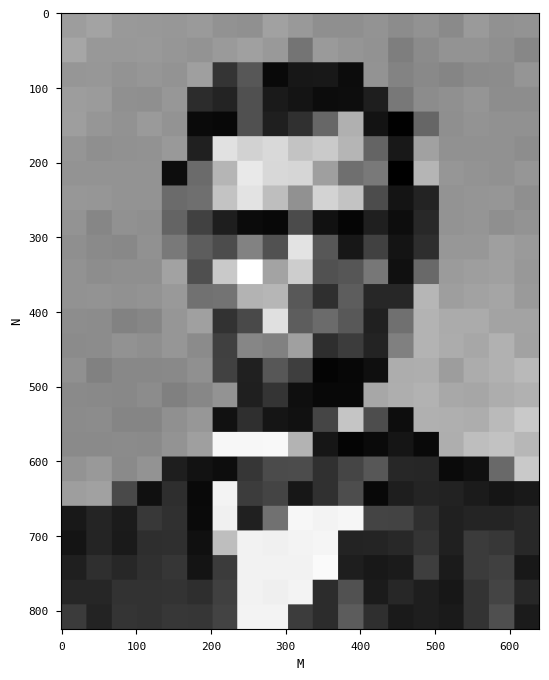

In [5]:
# Lincoln
lincoln = cv2.imread("/home/sparrow/cv/data/lincoln.png")
lincoln_gray = cv2.cvtColor(lincoln, cv2.COLOR_BGR2GRAY)

# Pixelize the image
lincoln_pixelized = cv2.resize(lincoln_gray, (0, 0), fx=0.03, fy=0.03, interpolation=cv2.INTER_NEAREST)
lincoln_pixelized = cv2.resize(lincoln_pixelized, (lincoln_gray.shape[1], lincoln_gray.shape[0]), interpolation=cv2.INTER_NEAREST)

print(lincoln_pixelized.shape)

# Show the image
plt.figure(figsize=(8, 8));
plt.xlabel("M");
plt.ylabel("N");
plt.imshow(lincoln_pixelized, cmap="gray");

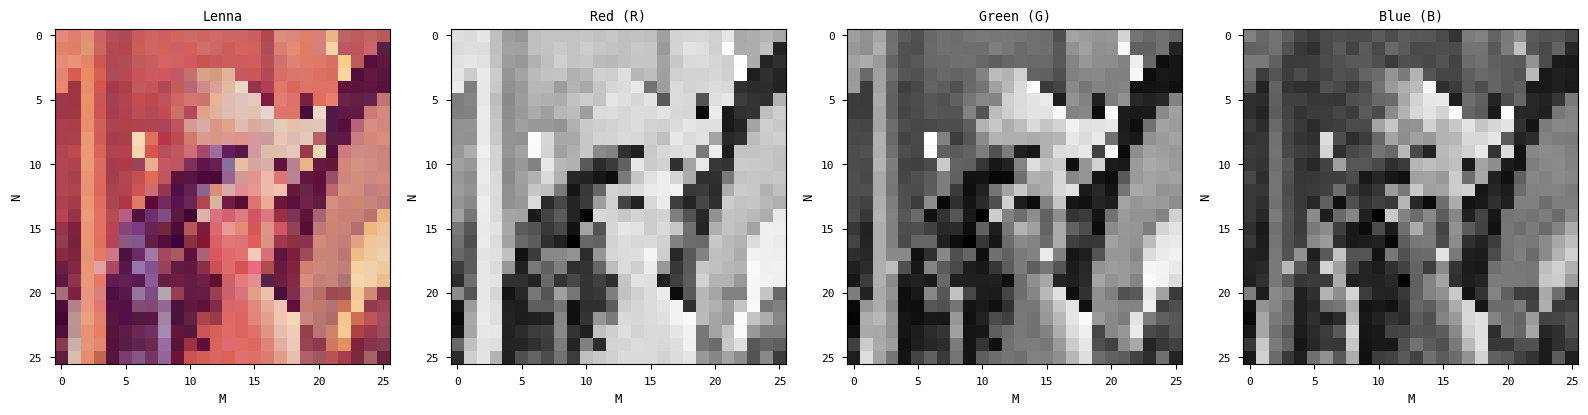

In [23]:
# Lenna
lenna = cv2.imread("/home/sparrow/cv/data/lenna.png")
lenna = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB)

# Pixelize the image
lenna = cv2.resize(lenna, (0, 0), fx=0.05, fy=0.05, interpolation=cv2.INTER_NEAREST)
lenna = cv2.resize(lenna, (lenna.shape[1], lenna.shape[0]), interpolation=cv2.INTER_NEAREST)

# Seperate the color channels
lenna_red = lenna[:, :, 0]
lenna_green = lenna[:, :, 1]
lenna_blue = lenna[:, :, 2]

# Show the images (Original and channels)
fig, ax = plt.subplots(1, 4, figsize=(16, 16))
ax[0].imshow(lenna);
ax[0].set_title("Lenna");
ax[1].imshow(lenna_red, cmap="gray");
ax[1].set_title("Red (R)");
ax[2].imshow(lenna_green, cmap="gray");
ax[2].set_title("Green (G)");
ax[3].imshow(lenna_blue, cmap="gray");
ax[3].set_title("Blue (B)");

# Add x and y labels
for i in range(4):
    ax[i].set_xlabel("M");
    ax[i].set_ylabel("N");

plt.tight_layout()
plt.show()

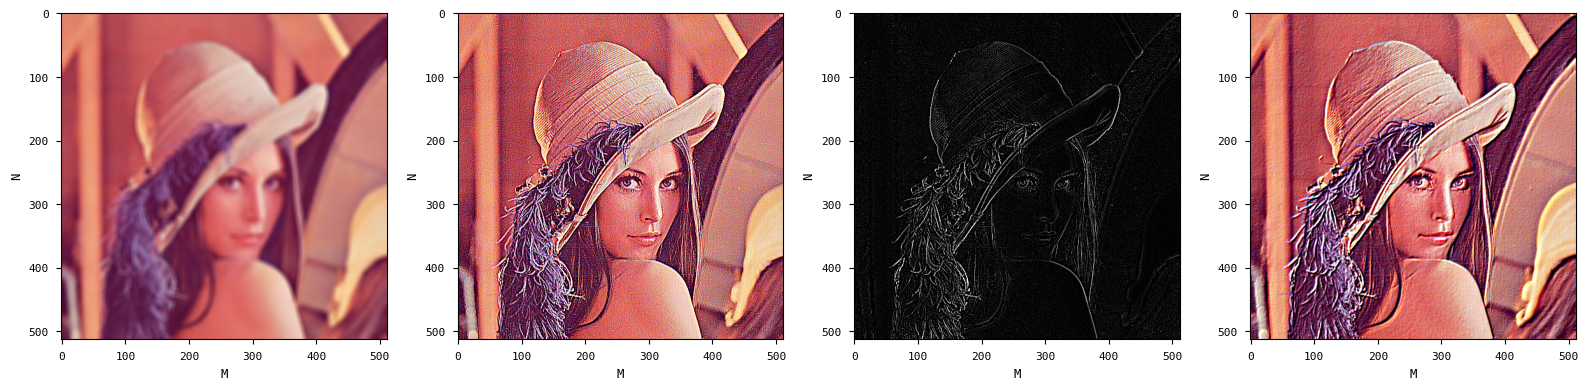

In [9]:
# Various spatial filtering on lenna
lenna = cv2.imread("/home/sparrow/cv/data/lenna.png")
lenna = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB)

# Blur
lenna_blur = cv2.blur(lenna, (9, 9))

# Sharpen
sharpening_kernel = np.array([[-1, -1, -1], [-1, 9, -1], [-1, -1, -1]])
lenna_sharpened = cv2.filter2D(lenna, -1, sharpening_kernel)

# Edge detection
edge_detection_kernel = np.array([[-1, -1, -1], [-1, 8, -1], [-1, -1, -1]])
lenna_edge_detected = cv2.filter2D(cv2.cvtColor(lenna, cv2.COLOR_RGB2GRAY), -1, edge_detection_kernel)

# Emboss
emboss_kernel = np.array([[-2, -1, 0], [-1, 1, 1], [0, 1, 2]])
lenna_embossed = cv2.filter2D(lenna, -1, emboss_kernel)

# Show the images
fig, ax = plt.subplots(1, 4, figsize=(16, 16))
ax[0].imshow(lenna_blur);
ax[1].imshow(lenna_sharpened);
ax[2].imshow(lenna_edge_detected, cmap="gray");
ax[3].imshow(lenna_embossed);

# Add x and y labels
for i in range(4):
    ax[i].set_xlabel("M");
    ax[i].set_ylabel("N");

plt.tight_layout()
plt.show()

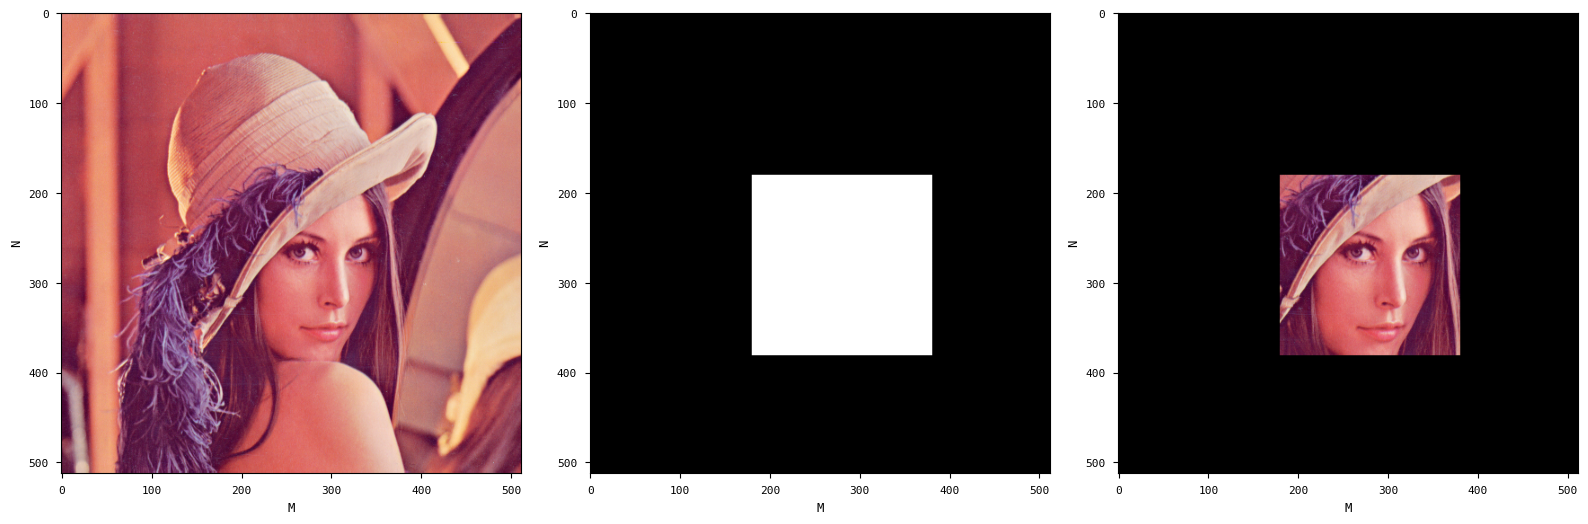

In [23]:
# Masking
lenna = cv2.imread("/home/sparrow/cv/data/lenna.png")
lenna = cv2.cvtColor(lenna, cv2.COLOR_BGR2RGB)

# Create a mask
mask = np.zeros_like(lenna)
# Face
cv2.rectangle(mask, (180, 180), (380, 380), (255, 255, 255), -1)

# Apply the mask
lenna_masked = cv2.bitwise_and(lenna, mask)

# Show the images (lenna, mask, masked lenna)
fig, ax = plt.subplots(1, 3, figsize=(16, 16))
ax[0].imshow(lenna);
ax[1].imshow(mask);
ax[2].imshow(lenna_masked);

# Add x and y labels
for i in range(3):
    ax[i].set_xlabel("M");
    ax[i].set_ylabel("N");
    
plt.tight_layout()
plt.show()

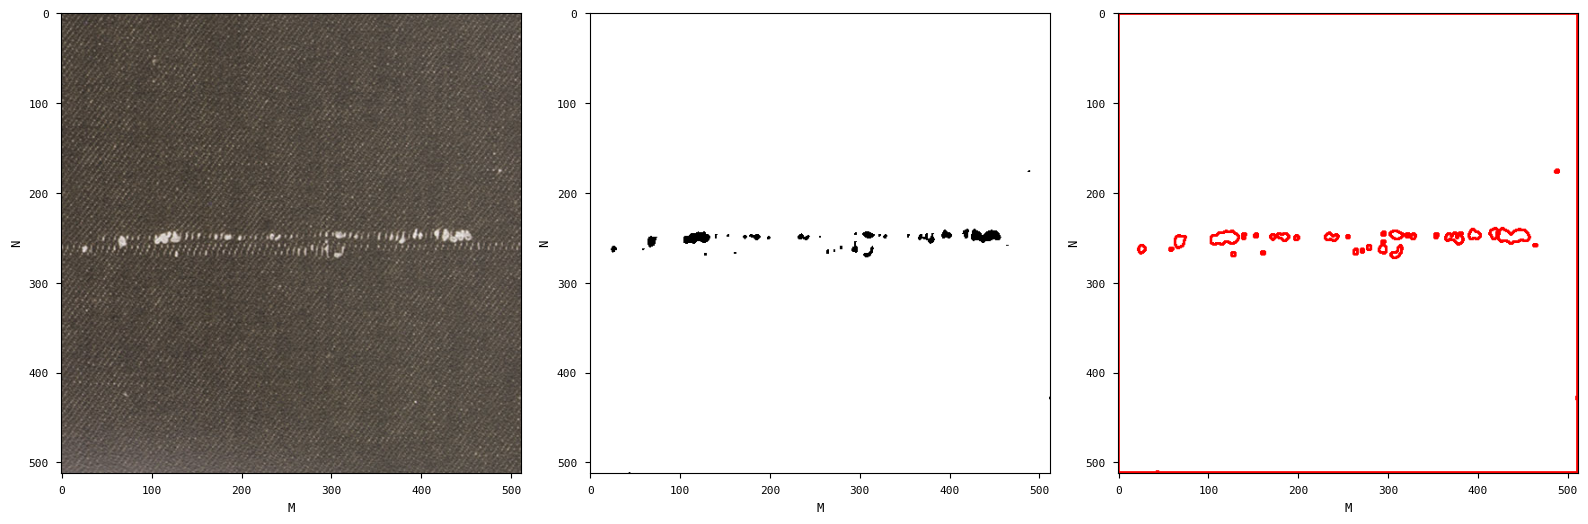

In [50]:
# Defect Detection with Contours
img = cv2.imread("/home/sparrow/cv/data/fabric.jpg")
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Apply a threshold
_, thresh = cv2.threshold(gray, 110, 255, cv2.THRESH_BINARY_INV)
thresh = cv2.medianBlur(thresh, 5)

# Find the contours
contours, _ = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)

# Draw the contours
contour_img = np.zeros_like(img)
contour_img = cv2.bitwise_not(contour_img)
# Draw defect contours
cv2.drawContours(contour_img, contours, -1, (255, 0, 0), 2)

# Show the images
fig, ax = plt.subplots(1, 3, figsize=(16, 16))
ax[0].imshow(img);
ax[1].imshow(thresh, cmap="gray");
ax[2].imshow(contour_img, cmap="gray");

# Add x and y labels
for i in range(3):
    ax[i].set_xlabel("M");
    ax[i].set_ylabel("N");

plt.tight_layout()
plt.show()

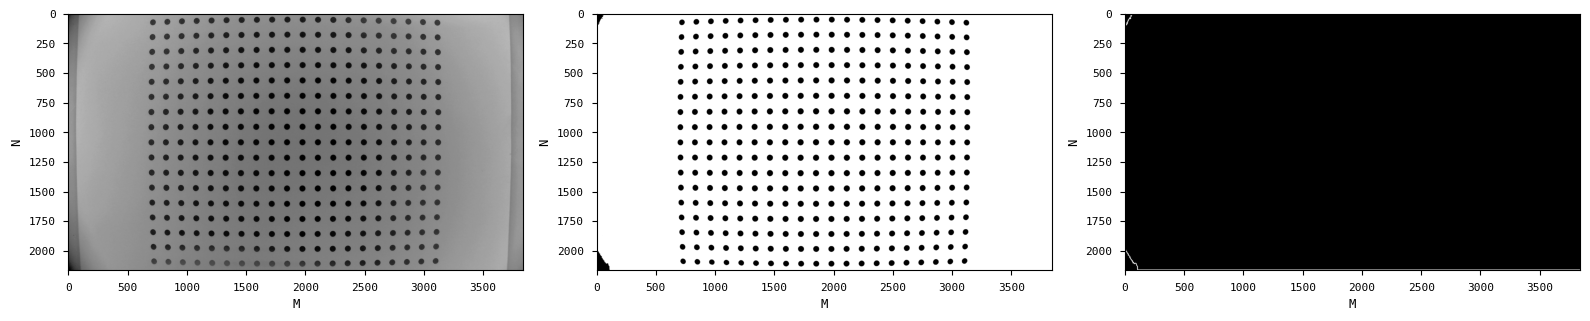

In [27]:
# Drawing Distortion from Calibration Grid
grid = cv2.imread("/home/sparrow/cv/data/calibration.png")
